In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

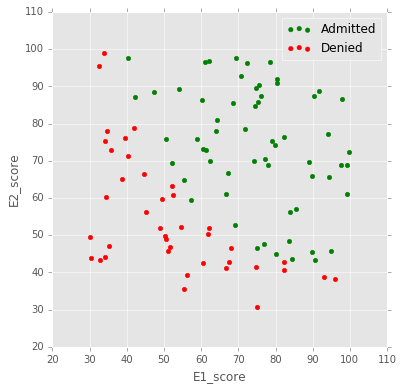

In [2]:
# load and plot sample data
df = pd.read_csv('ex2data1.txt', header=None, names=['E1_score', 'E2_score', 'y'])
df.loc[:, 'Result'] = df['y'].apply(lambda x: "Admitted" if x==1 else "Denied")
fig1, ax1 = plt.subplots(figsize=(6, 6))
colors = ['g', 'r']

g = df.groupby('Result')

# plot data by groups
for i, (name, group) in enumerate(g):
    ax1.scatter(group.E1_score, group.E2_score, label=name, color=colors[i])
ax1.legend()
ax1.set_xlabel('E1_score')
ax1.set_ylabel('E2_score')


In [4]:
# define functions for logistic regressions

def sigmoid(x):
    """sigmoid function
    """
    return 1.0/(1 + np.exp(-x))

def cost_func(theta, x, y):
    """calculate cost function
    """
    m = x.shape[0]
    J = 1/float(m)*np.sum(-y*np.log(sigmoid(x.dot(theta))) -
                          (1-y)*np.log(1 - sigmoid(x.dot(theta))))
    return J
    
def gradient(theta, x, y, alpha):
    """gradient descent algorithm
    """
    
    new_theta = theta - alpha*x.T.dot((sigmoid(x.dot(theta)) - y))
    return new_theta



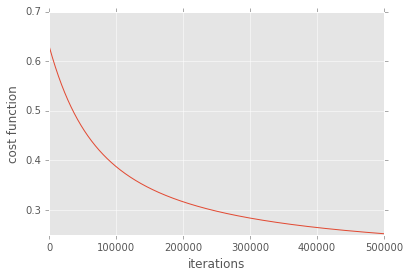

In [6]:
# preparing data

x_data = df.iloc[:, 0:2].values
ones = np.ones([x_data.shape[0], 1])
x_data = np.hstack([ones, x_data]) # adding a column of ones to the beginning of data

y_data = df.iloc[:, 2].values
cost_function = []
new_theta =  np.array([0, 0, 0 ]) #initialize thetas
fig, ax = plt.subplots()

for i in range(500000):
    new_theta = gradient(new_theta, x_data, y_data, alpha=0.00001)
    cost_function.append(cost_func(new_theta, x_data, y_data))

ax.plot(cost_function)
ax.set_xlabel('iterations')
ax.set_ylabel('cost function')

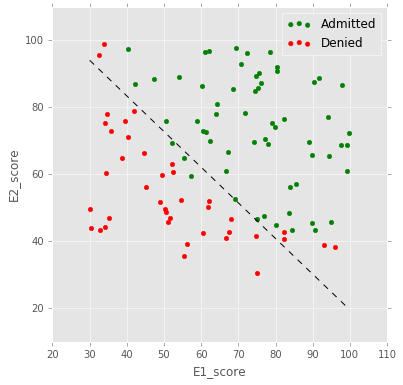

In [7]:
# calculate predicted values based on regression results
predict = sigmoid(x_data.dot(new_theta))
predict = [1 if i > 0.5 else 0 for i in predict]

df.loc[:, "Predict"] = predict
df.loc[:, "diff"] = (df.Predict - df.y).abs()

# plot decision boundary
x1 = np.linspace(df.iloc[:, 0].min(), df.iloc[:, 0].max(), 10)
x2 = -(new_theta[0] + new_theta[1]*x1)/new_theta[2]

ax1.plot(x1, x2, color='k', linestyle='--')
fig1